Programming for Business Analytics
**Gray 15** - Final Project

Team members:
- Raza Khan
- Gerardo Garza
- Megan Gonzalez
- Roza Gal
- Stephanie Kaufman
- Simi Filani


In [ ]:
# Import necessary libraries
from google.colab import files
import polars as pl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
from google.colab import files
import polars as pl
import os

uploaded = files.upload()

print("Files here:", os.listdir())

# Load all datasets
customers = pl.read_csv("Customers.csv")
orders = pl.read_csv("Orders.csv")
items = pl.read_csv("Items.csv")
products = pl.read_csv("Products.csv")
stores = pl.read_csv("Stores.csv")
supplies = pl.read_csv("Supplies.csv")

# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

Saving Customers.csv to Customers.csv
Saving Items.csv to Items.csv
Saving Orders.csv to Orders.csv
Saving Products.csv to Products.csv
Saving Stores.csv to Stores.csv
Saving Supplies.csv to Supplies.csv
Files here: ['.config', 'Products.csv', 'Stores.csv', 'Supplies.csv', 'Orders.csv', 'Items.csv', 'Customers.csv', 'sample_data']
Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


In [ ]:
#Question 1

# Q1.1: Calculate total revenue
total_revenue = orders.select(pl.sum("order_total")).item()
print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $66038193.00


In [ ]:
# Q1.2: Revenue by store location
revenue_by_store = (
    orders.group_by("store_id")
    .agg(pl.sum("order_total").alias("revenue"))
    .join(stores.select(["id", "name"]), left_on = "store_id", right_on = 'id', how = "left")
    .select(["store_id", "name", "revenue"])
    .sort("revenue", descending=True)
    )
revenue_by_store


store_id,name,revenue
str,str,i64
"""a9128331-08d7-41a2-b615-21283e…","""Philadelphia""",43215565
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""Brooklyn""",22822628


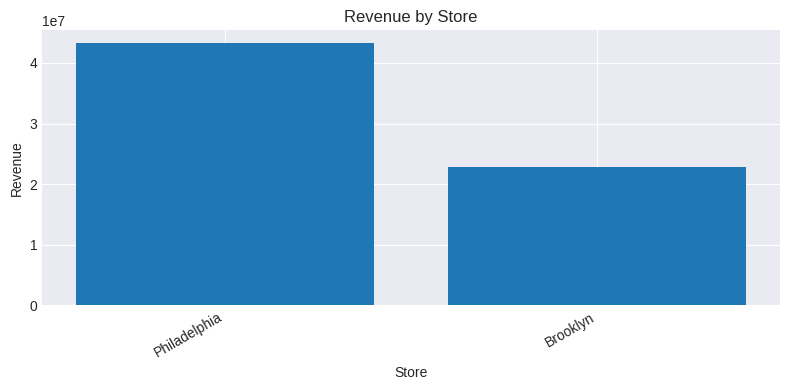

In [ ]:
#Q1.2 Chart

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(revenue_by_store["name"], revenue_by_store["revenue"])
plt.title("Revenue by Store")
plt.xlabel("Store")
plt.ylabel("Revenue")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Q1.3: Monthly revenue trends

monthly_revenue_trends = (
    orders.with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S").dt.truncate("1mo").alias("month"))
    .group_by("month")
    .agg(pl.sum("order_total").alias("monthly_revenue"))
    .sort("month")
    )
monthly_revenue_trends

month,monthly_revenue
datetime[μs],i64
2016-09-01 00:00:00,1644922
2016-10-01 00:00:00,1956651
2016-11-01 00:00:00,2552662
2016-12-01 00:00:00,3307337
2017-01-01 00:00:00,3821291
…,…
2017-04-01 00:00:00,7392014
2017-05-01 00:00:00,8469909
2017-06-01 00:00:00,8617148


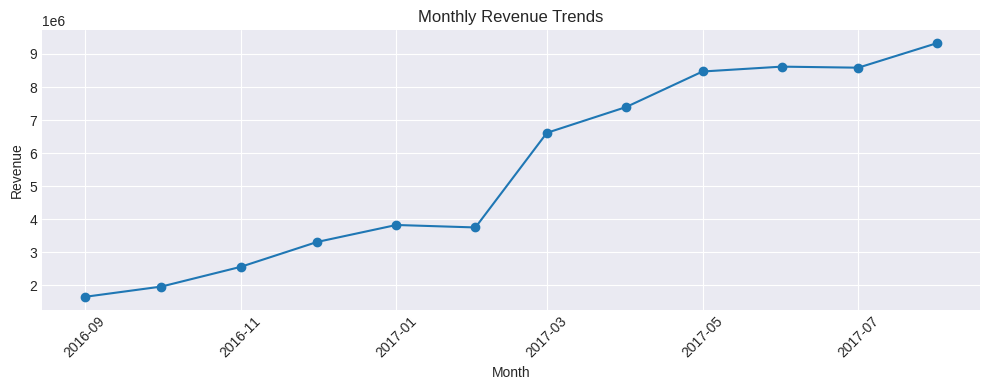

In [ ]:
#Q1.3 - Chart
plt.figure(figsize=(10,4))
plt.plot(monthly_revenue_trends["month"], monthly_revenue_trends["monthly_revenue"], marker="o")
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Q1.4: Revenue by day of week

orders = pl.read_csv("Orders.csv")
print(orders.columns)
print(orders.head(3))

orders = orders.with_columns(
    pl.col("ordered_at").str.to_datetime(strict=False).alias("ordered_at")
)

revenue_by_day_of_week = (
    orders
    .with_columns([
        pl.col("ordered_at").dt.weekday().alias("weekday_num"),
        pl.col("ordered_at").dt.strftime("%A").alias("day_of_week")
    ])
    .group_by(["weekday_num", "day_of_week"])
    .agg(pl.sum("order_total").alias("revenue"))
    .sort("weekday_num")
    .select(["day_of_week", "revenue"])
)

revenue_by_day_of_week

['id', 'customer', 'ordered_at', 'store_id', 'subtotal', 'tax_paid', 'order_total']
shape: (3, 7)
┌───────────────┬───────────────┬───────────────┬──────────────┬──────────┬──────────┬─────────────┐
│ id            ┆ customer      ┆ ordered_at    ┆ store_id     ┆ subtotal ┆ tax_paid ┆ order_total │
│ ---           ┆ ---           ┆ ---           ┆ ---          ┆ ---      ┆ ---      ┆ ---         │
│ str           ┆ str           ┆ str           ┆ str          ┆ i64      ┆ i64      ┆ i64         │
╞═══════════════╪═══════════════╪═══════════════╪══════════════╪══════════╪══════════╪═════════════╡
│ 363ab5f2-78b4 ┆ ae3a050d-287f ┆ 2016-09-01T14 ┆ a9128331-08d ┆ 1700     ┆ 102      ┆ 1802        │
│ -4227-9333-97 ┆ -4257-a778-cd ┆ :49:00        ┆ 7-41a2-b615- ┆          ┆          ┆             │
│ 01ef…         ┆ b420…         ┆               ┆ 21283e…      ┆          ┆          ┆             │
│ d6cdb882-aa8c ┆ 33a51363-1989 ┆ 2016-09-01T08 ┆ a9128331-08d ┆ 600      ┆ 36       ┆ 636    

day_of_week,revenue
str,i64
"""Monday""",10611971
"""Tuesday""",10814455
"""Wednesday""",10834569
"""Thursday""",10829195
"""Friday""",10758715
"""Saturday""",5981489
"""Sunday""",6207799


In [ ]:
#Question 2

#Q2.1

if "quantity" in items.columns:
    items_enriched = items.with_columns(pl.col("quantity").alias("qty"))
else:
    items_enriched = items.with_columns(pl.lit(1).alias("qty"))

items_priced = (
    items_enriched
    .join(products.select(["sku", "type", "price"]), on="sku", how="left")
    .with_columns((pl.col("qty") * pl.col("price")).alias("item_revenue"))
)

revenue_by_category = (
    items_priced
    .group_by("type")
    .agg(pl.sum("item_revenue").alias("revenue"))
    .sort("revenue", descending=True)
)
revenue_by_category


type,revenue
str,i64
"""beverage""",39836200
"""jaffle""",22880900


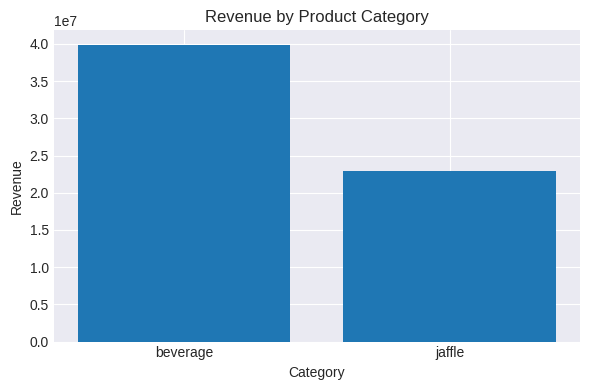

In [ ]:
#Q2.2 Chart

plt.figure(figsize=(6,4))
plt.bar(revenue_by_category["type"], revenue_by_category["revenue"])
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [ ]:
#Q2.2

avg_price_by_type = (
    products.group_by("type")
    .agg(pl.mean("price").alias("avg_price"))
    .sort("type")
)
avg_price_by_type

type,avg_price
str,f64
"""beverage""",560.0
"""jaffle""",1200.0


In [ ]:
#Question 3

#Q3.1
revenue_by_store_core = (
    orders
    .group_by("store_id")
    .agg(pl.sum("order_total").alias("revenue"))
)

max_order_ts = orders.select(pl.max("ordered_at")).item()

revenue_per_day_by_store = (
    revenue_by_store_core
    .join(stores.select(["id","name","opened_at"]), left_on="store_id", right_on="id", how="left")
    .with_columns(
        (pl.col("opened_at").str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S")).alias("opened_at_dt")
    )
    .with_columns(
        (pl.lit(max_order_ts).str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S") - pl.col("opened_at_dt")).cast(pl.Int64).alias("days_active")
    )
    .with_columns(
        (pl.col("days_active") / (1000 * 1000 * 1000 * 60 * 60 * 24)).cast(pl.Int64).alias("days_active_calculated")
    )
    .with_columns(
        pl.col("days_active_calculated").clip(lower_bound=1)
    )
    .with_columns(
        (pl.col("revenue") / pl.col("days_active_calculated").cast(pl.Float64)).alias("revenue_per_day")
    )
    .select(["store_id","name","revenue","days_active_calculated","revenue_per_day"])
    .sort("revenue_per_day", descending=True)
)

revenue_per_day_by_store

NameError: name 'orders' is not defined

In [ ]:
#Q3.1 Chart

_top = revenue_per_day_by_store.head(10)
plt.figure(figsize=(9,4))
plt.bar(_top["name"], _top["revenue_per_day"])
plt.title("Top Stores by Revenue per Day Since Opening")
plt.xlabel("Store")
plt.ylabel("Revenue per Day")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()




NameError: name 'revenue_per_day_by_store' is not defined

In [ ]:
#Q3.2 - IDK WHAT ITS ASKING FOR

tax_rate_performance = (
    revenue_per_day_by_store
    .join(stores.select(["id","tax_rate"]), left_on="store_id", right_on="id", how="left")
    .select(["store_id","name","tax_rate","revenue_per_day"])
)

tax_rate_performance

In [ ]:
#Question 4

#Q4.1 Distribution of order values

order_value_distribution = (
    orders
    .select([
        pl.col("id").alias("order_id"),
        pl.col("order_total").cast(pl.Float64).alias("order_value")
    ])
)

print(order_value_distribution)


order_value_stats = order_value_distribution.select([
    pl.mean("order_value").alias("avg"),
    pl.median("order_value").alias("median"),
    pl.quantile("order_value", 0.25).alias("q25"),
    pl.quantile("order_value", 0.75).alias("q75"),
    pl.min("order_value").alias("min"),
    pl.max("order_value").alias("max"),
])
print(order_value_stats)

In [ ]:
#Q4.2 Repeat customers analysis

repeat_customer_analysis = (
    orders
    .group_by("customer")
    .agg([
        pl.len().alias("orders_count"),
        pl.sum("order_total").alias("customer_revenue")
    ])
    .with_columns(
        (pl.col("orders_count") > 1).alias("is_repeat")
    )
)

repeat_summary = (
    repeat_customer_analysis
    .group_by("is_repeat")
    .agg([
        pl.count().alias("num_customers"),
        pl.sum("customer_revenue").alias("revenue")
    ])
)
repeat_summary

In [ ]:
#Q4.3 Top revenue contributors

top_revenue_customers = (
    repeat_customer_analysis
    .sort("customer_revenue", descending=True)
    .head(10)
    .join(
        customers.select([pl.col("id").alias("customer"), "name"]),
        on="customer",
        how="left"
    )
    .select(["customer", "name", "orders_count", "customer_revenue"])
)
top_revenue_customers

In [ ]:
# Question 5

sku_costs = (
    supplies
    .group_by("sku")
    .agg(pl.sum("cost").alias("unit_cost"))
)

items_costed = (
    items
    .join(products.select(["sku", "name", "type", "price"]), on="sku", how="left")
    .join(sku_costs, on="sku", how="left")
    .with_columns([
        pl.lit(1).alias("qty"),
        (pl.col("price")).alias("item_revenue"),
        (pl.col("unit_cost").fill_null(0)).alias("item_cost")
    ])
)

items_costed_orders = (
    items_costed
    .join(orders.select([pl.col("id").alias("order_id_join"), "id", "store_id"]),
          left_on="order_id", right_on="id", how="left")
    .drop("order_id_join")
)

#Q5.1 Calculate gross margin per product
product_margins = (
    items_costed
    .group_by("sku")
    .agg([
        pl.first("name").alias("product_name"),
        pl.first("type").alias("product_type"),
        pl.first("price").alias("list_price"),
        pl.first("unit_cost").fill_null(0).alias("unit_cost"),
        pl.count().alias("units_sold"),
        pl.sum("item_revenue").alias("revenue"),
        pl.sum("item_cost").alias("cost"),
    ])
    .with_columns([
        (pl.col("revenue") - pl.col("cost")).alias("profit"),
        pl.when(pl.col("revenue") > 0)
          .then((pl.col("revenue") - pl.col("cost")) / pl.col("revenue"))
          .otherwise(0.0)
          .alias("margin_pct")
    ])
    .sort("sku")
)
product_margins

In [ ]:
#Q5.2 Products with highest profit margins

highest_margin_products = (
    product_margins
    .sort(["margin_pct", "revenue"], descending=[True, True])
    .head(10)
    .select(["sku", "product_name", "product_type", "units_sold", "revenue", "profit", "margin_pct"])
)
highest_margin_products


In [ ]:
#Q5.3 Order size vs profitability

order_size_profitability = (
    items_costed
    .group_by("order_id")
    .agg([
        pl.len().alias("items_in_order"),
        pl.sum("item_revenue").alias("order_revenue"),
        pl.sum("item_cost").alias("order_cost"),
    ])
    .with_columns([
        (pl.col("order_revenue") - pl.col("order_cost")).alias("order_profit"),
    ])
    .with_columns([
        pl.when(pl.col("items_in_order") > 0)
          .then(pl.col("order_profit") / pl.col("items_in_order"))
          .otherwise(0.0)
          .alias("profit_per_item"),
        pl.when(pl.col("order_revenue") > 0)
          .then(pl.col("order_profit") / pl.col("order_revenue"))
          .otherwise(0.0)
          .alias("order_margin"),
    ])
)
order_size_profitability

In [ ]:
#Q5.4 Profitability by store

store_profitability = (
    items_costed_orders
    .group_by("store_id")
    .agg([
        pl.sum("item_revenue").alias("revenue"),
        pl.sum("item_cost").alias("cost"),
    ])
    .with_columns([
        (pl.col("revenue") - pl.col("cost")).alias("profit"),
    ])
    .with_columns([
        pl.when(pl.col("revenue") > 0)
          .then(pl.col("profit") / pl.col("revenue"))
          .otherwise(0.0)
          .alias("margin_pct")
    ])
    .join(stores.select([pl.col("id").alias("store_id"), "name"]), on="store_id", how="left")
    .select(["store_id", "name", "revenue", "cost", "profit", "margin_pct"])
    .sort("margin_pct", descending=True)
)
store_profitability

## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.


In [ ]:
#Recommendation 1 Code:

import polars as pl

items_enriched = (
    items.join(products.select(["product_id", "category"]), on="product_id", how="left")
         .with_columns(pl.col("category").str.to_lowercase().alias("cat"))
)

order_flags = (
    items_enriched.with_columns([
        (pl.col("cat") == "beverage").alias("is_bev"),
        (pl.col("cat") == "jaffle").alias("is_jaf"),
    ])
    .group_by("order_id")
    .agg([
        pl.max("is_bev").alias("has_bev"),
        pl.max("is_jaf").alias("has_jaf"),
    ])
    .with_columns((pl.col("has_bev") & pl.col("has_jaf")).alias("is_bundle"))
)

orders_t = (
    orders
    .with_columns(pl.col("ordered_at").str.strptime(pl.Datetime, strict=False).alias("dt"))
    .with_columns([
        pl.col("dt").dt.weekday().alias("wday"),
        pl.col("dt").dt.year().alias("year"),
        pl.col("dt").dt.week().alias("week"),
    ])
    .join(order_flags, on="order_id", how="left")
    .with_columns([
        pl.col("has_bev").fill_null(False),
        pl.col("has_jaf").fill_null(False),
        pl.col("is_bundle").fill_null(False),
    ])
)

aov_summary = (
    orders_t
    .with_columns(pl.when(pl.col("has_bev")).then("with_beverage").otherwise("no_beverage").alias("grp"))
    .group_by("grp")
    .agg([
        pl.count().alias("orders"),
        pl.mean("order_total").alias("aov")
    ])
)

weekday_revenue = (
    orders_t.group_by("wday").agg(pl.sum("order_total").alias("revenue"))
            .sort("revenue", descending=True)
)
top_weekdays = weekday_revenue.head(2)

chain_attach = orders_t.select(pl.mean(pl.col("has_bev").cast(pl.Float64)).alias("rate")).item()
attach_by_store = (
    orders_t.group_by("store_id").agg(pl.mean(pl.col("has_bev").cast(pl.Float64)).alias("attach_rate"))
            .with_columns((pl.col("attach_rate") - chain_attach).alias("gap_vs_chain"))
            .sort("gap_vs_chain")
)

weekly_kpis = (
    orders_t.group_by(["year", "week"])
            .agg([
                pl.count().alias("orders"),
                pl.mean("order_total").alias("aov"),
                pl.mean(pl.col("has_bev").cast(pl.Float64)).alias("bev_attach"),
                pl.mean(pl.col("is_bundle").cast(pl.Float64)).alias("bundle_share"),
            ])
            .sort(["year", "week"])
)

NameError: name 'items' is not defined

In [ ]:
from google.colab import files
import polars as pl
import os

uploaded = files.upload()

print("Files here:", os.listdir())

customers = pl.read_csv("Customers.csv")
orders = pl.read_csv("Orders.csv")
items = pl.read_csv("Items.csv")
products = pl.read_csv("Products.csv")
stores = pl.read_csv("Stores.csv")
supplies = pl.read_csv("Supplies.csv")

print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

#Recommendation 1 – Increase Average Order Value with Bundles
Our analysis showed that tickets including beverages had a noticeably higher average order value than those without, yet only a small portion of customers purchased a jaffle and a beverage together. To capture this opportunity, Jaffle Shop should introduce a standard “Jaffle + Beverage” meal deal across stores, promote it more heavily on the two weekdays with the strongest revenue, and have staff encourage the option at checkout in locations where beverage attach rates fall below average. By making the bundle easy and consistent while tracking beverage attach rates, bundle share, and average order value each week, the shop can drive higher sales and profitability without adding major operational complexity.


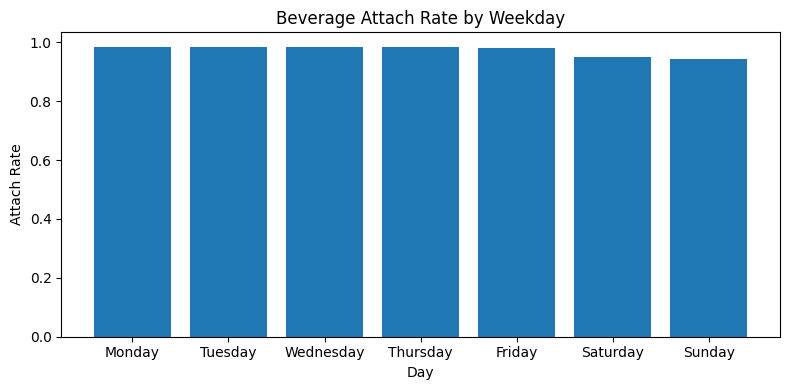

In [ ]:
#Recommendation 1 Code:

import polars as pl
import matplotlib.pyplot as plt

if orders.schema.get("ordered_at") != pl.Datetime:
    orders = orders.with_columns(pl.col("ordered_at").str.to_datetime(strict=False).alias("ordered_at"))

items_with_type = items.join(products.select(["sku", "type"]), on="sku", how="left")

beverage_items = items_with_type.filter(pl.col("type") == "beverage").select(["order_id"])
jaffle_items = items_with_type.filter(pl.col("type") == "jaffle").select(["order_id"])

by_order_flags = (
    items_with_type
    .group_by("order_id")
    .agg([
        pl.len().alias("items_total"),
    ])
    .with_columns([
        pl.col("order_id").is_in(beverage_items["order_id"]).alias("has_bev"),
        pl.col("order_id").is_in(jaffle_items["order_id"]).alias("has_jaffle"),
    ])
    .with_columns([
        ((pl.col("has_bev") > 0) & (pl.col("has_jaffle") > 0)).alias("is_bundle")
    ])
    .join(orders.select(["id","order_total","ordered_at"]), left_on="order_id", right_on="id", how="left")
)


aov_comparison = (
    by_order_flags
    .group_by("has_bev")
    .agg(pl.mean("order_total").alias("avg_order_total_cents"),
         pl.len().alias("num_orders"))
    .with_columns(
        (pl.col("avg_order_total_cents")/100).round(2).alias("avg_order_total_$")
    )
    .select(["has_bev","num_orders","avg_order_total_$"])
)
aov_comparison

attach_and_bundle = (
    by_order_flags
    .select([
        pl.col("has_bev").mean().cast(pl.Float64).alias("attach_rate_bev"),
        pl.col("is_bundle").mean().cast(pl.Float64).alias("bundle_share")
    ])
)
attach_and_bundle

weekday_attach = (
    by_order_flags
    .with_columns([
        pl.col("ordered_at").dt.weekday().alias("weekday_num"),
        pl.col("ordered_at").dt.strftime("%A").alias("day_of_week")
    ])
    .group_by(["weekday_num","day_of_week"])
    .agg([
        pl.col("has_bev").mean().cast(pl.Float64).alias("attach_rate_bev"),
        pl.col("is_bundle").mean().cast(pl.Float64).alias("bundle_share"),
        pl.len().alias("orders")
    ])
    .sort("weekday_num")
    .select(["day_of_week","attach_rate_bev","bundle_share","orders"])
)
weekday_attach

plt.figure(figsize=(8,4))
plt.bar(weekday_attach["day_of_week"].to_list(), weekday_attach["attach_rate_bev"].to_list())
plt.title("Beverage Attach Rate by Weekday")
plt.xlabel("Day")
plt.ylabel("Attach Rate")
plt.tight_layout(); plt.show()

#Recommendation 2 – Improve Profit Margins by Adjusting Product Mix
Our product margin analysis showed that several low-margin, high-volume items are dragging down overall profitability despite their popularity, while higher-margin “hero” products remain under-promoted. To address this, Jaffle Shop should make targeted changes such as modest price increases ($0.25–$0.50) or slight portion adjustments for the low-margin bestsellers, paired with supplier renegotiations to bring down unit costs. At the same time, high-margin items should be given greater visibility on menus and featured more prominently in bundles and promotions to help shift demand toward these more profitable options. This balanced approach addresses margin leaks while boosting the impact of high-margin products, supporting stronger gross margins without significantly hurting sales volume.

In [ ]:
import polars as pl

products_clean = products.with_columns(pl.col("price").cast(pl.Int64))
supplies_clean = supplies.with_columns(pl.col("cost").cast(pl.Int64))

sku_costs = (
    supplies_clean
    .group_by("sku")
    .agg(pl.sum("cost").alias("unit_cost"))
)

items_costed = (
    items
    .join(products_clean.select(["sku","name","type","price"]), on="sku", how="left")
    .join(sku_costs, on="sku", how="left")
    .with_columns([
        pl.col("unit_cost").fill_null(0).alias("unit_cost"),
        pl.col("price").alias("item_revenue"),
        pl.col("unit_cost").alias("item_cost"),
    ])
)

product_margins = (
    items_costed
    .group_by("sku")
    .agg([
        pl.first("name").alias("product_name"),
        pl.first("type").alias("product_type"),
        pl.first("price").alias("list_price_cents"),
        pl.first("unit_cost").fill_null(0).alias("unit_cost_cents"),
        pl.len().alias("units_sold"),
        pl.sum("item_revenue").alias("revenue_cents"),
        pl.sum("item_cost").alias("cost_cents"),
    ])
    .with_columns([
        (pl.col("revenue_cents") - pl.col("cost_cents")).alias("profit_cents"),
        pl.when(pl.col("revenue_cents") > 0)
          .then((pl.col("revenue_cents") - pl.col("cost_cents")) / pl.col("revenue_cents"))
          .otherwise(0.0)
          .alias("margin_pct"),
    ])
)

q25_margin = product_margins.select(pl.quantile("margin_pct", 0.25)).item()
q75_units  = product_margins.select(pl.quantile("units_sold", 0.75)).item()

low_margin_high_vol = (
    product_margins
    .filter(
        (pl.col("margin_pct") <= q25_margin) &
        (pl.col("units_sold") >= q75_units)
    )
    .sort(["margin_pct","units_sold"])
)

if low_margin_high_vol.height == 0:
    N = min(10, product_margins.height)
    low_margin_high_vol = product_margins.sort("margin_pct").head(N)

deltas = [25, 50]
sim_df = low_margin_high_vol.select([
    "sku","product_name","units_sold","list_price_cents","unit_cost_cents",
    "revenue_cents","profit_cents","margin_pct"
])

exprs = []
for d in deltas:
    rev_plus  = pl.col("revenue_cents") + pl.col("units_sold") * d
    prof_plus = rev_plus - pl.col("unit_cost_cents") * pl.col("units_sold")
    exprs += [
        rev_plus.alias(f"revenue_cents_plus_{d}"),
        prof_plus.alias(f"profit_cents_plus_{d}"),
        pl.when(rev_plus > 0).then(prof_plus / rev_plus).otherwise(0.0).alias(f"margin_pct_plus_{d}"),
    ]

sim_df = sim_df.with_columns(exprs).with_columns([
    (pl.col("profit_cents_plus_25") - pl.col("profit_cents")).alias("delta_profit_+25c"),
    (pl.col("profit_cents_plus_50") - pl.col("profit_cents")).alias("delta_profit_+50c"),
])

sim_df.sort("delta_profit_+25c", descending=True).head(10)

sku,product_name,units_sold,list_price_cents,unit_cost_cents,revenue_cents,profit_cents,margin_pct,revenue_cents_plus_25,profit_cents_plus_25,margin_pct_plus_25,revenue_cents_plus_50,profit_cents_plus_50,margin_pct_plus_50,delta_profit_+25c,delta_profit_+50c
str,str,u32,i64,i64,i64,i64,f64,i64,i64,f64,i64,i64,f64,i64,i64
"""BEV-002""","""chai and mighty""",14359,500,175,7179500,4666675,0.65,7538475,5025650,0.666667,7897450,5384625,0.681818,358975,717950


#Recommendation 3 – Focus Investment on High-Performing Stores and Local Pricing Strategy
Our revenue-per-day analysis showed that some stores consistently outperform others, with the top quintile generating significantly higher daily returns since opening. These stores should be prioritized for added staffing, extended operating hours, and targeted local marketing to maximize ROI, while underperforming locations should focus on margin improvements from Recommendation 2 before receiving further investment. In addition, our tax rate analysis indicated that higher local sales taxes may dampen demand; to address this, Jaffle Shop should pilot tax-inclusive pricing in higher-tax markets to reduce sticker shock and measure its effect on order volume. By directing resources toward proven high-return stores and adapting pricing to local conditions, Jaffle Shop can drive growth that is both sustainable and profitable.


Correlation (tax_rate vs revenue/day cents): -1.000


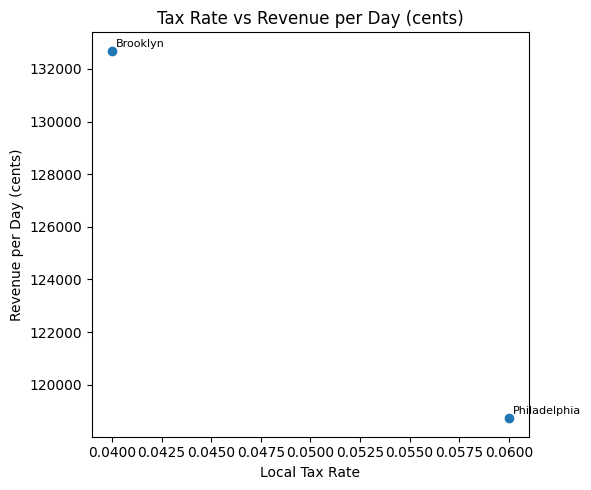

name,orders,avg_order_total_$,avg_order_total_cents,tax_rate
str,u32,f64,f64,f64


In [ ]:
if orders.schema.get("ordered_at") != pl.Datetime:
    orders = orders.with_columns(pl.col("ordered_at").str.to_datetime(strict=False).alias("ordered_at"))
if stores.schema.get("opened_at") != pl.Datetime:
    stores = stores.with_columns(pl.col("opened_at").str.to_datetime(strict=False).alias("opened_at"))

revenue_by_store_core = (
    orders.group_by("store_id").agg(pl.sum("order_total").alias("revenue_cents"))
)
max_ts = orders.select(pl.max("ordered_at")).item()

revenue_per_day_by_store = (
    revenue_by_store_core
    .join(stores.select(["id","name","opened_at","tax_rate"]), left_on="store_id", right_on="id", how="left")
    .with_columns(((pl.lit(max_ts) - pl.col("opened_at")).dt.total_days()).alias("days_active_f"))
    .with_columns(pl.col("days_active_f").ceil().clip(lower_bound=1).cast(pl.Int64).alias("days_active"))
    .with_columns((pl.col("revenue_cents") / pl.col("days_active").cast(pl.Float64)).alias("revenue_per_day_cents"))
    .select(["store_id","name","tax_rate","revenue_cents","days_active","revenue_per_day_cents"])
    .sort("revenue_per_day_cents", descending=True)
)
revenue_per_day_by_store

top2 = revenue_per_day_by_store.head(2)
bottom2 = revenue_per_day_by_store.tail(2)
top2, bottom2

tax_rate_performance = revenue_per_day_by_store.select(["store_id","name","tax_rate","revenue_per_day_cents"])
corr_tax_perf = tax_rate_performance.select(pl.corr("tax_rate","revenue_per_day_cents").alias("corr")).item()
print(f"Correlation (tax_rate vs revenue/day cents): {corr_tax_perf:.3f}")

plt.figure(figsize=(6,5))
plt.scatter(
    tax_rate_performance["tax_rate"].to_list(),
    tax_rate_performance["revenue_per_day_cents"].to_list()
)
for n, x, y in zip(
    tax_rate_performance["name"].to_list(),
    tax_rate_performance["tax_rate"].to_list(),
    tax_rate_performance["revenue_per_day_cents"].to_list()
):
    plt.annotate(n, (x, y), fontsize=8, xytext=(3,3), textcoords="offset points")
plt.title("Tax Rate vs Revenue per Day (cents)")
plt.xlabel("Local Tax Rate"); plt.ylabel("Revenue per Day (cents)")
plt.tight_layout(); plt.show()

median_tax = stores.select(pl.median("tax_rate")).item()
high_tax_baseline = (
    orders
    .join(stores.select([pl.col("id").alias("store_id"),"name","tax_rate"]), on="store_id", how="left")
    .filter(pl.col("tax_rate") >= median_tax)
    .group_by(["name", "tax_rate"])
    .agg([
        pl.len().alias("orders"),
        pl.mean("order_total").alias("avg_order_total_cents"),
    ])
    .with_columns((pl.col("avg_order_total_cents")/100).round(2).alias("avg_order_total_$"))
    .select(["name","orders","avg_order_total_$","avg_order_total_cents","tax_rate"])
    .sort("tax_rate", descending=True)
)
high_tax_baseline

# Executive Summary
This data-driven review examines Jaffle Shop’s business performance and provides detailed insights to inform the executive team’s strategic decisions. Using Polars library in Python, our team analyzed datasets on customer orders, pricing, supply cost, and store locations. Our work highlights revenue trends, evaluates product profitability, assesses customer behavior, and identifies opportunities for store expansion and operational efficiency, all aimed at pinpointing growth opportunities and informing Jaffle Shop’s future business strategy.

# Key Findings

**Finding 1 – Order Value Distribution and Bundling Impact**

Our analysis on orders indicates that the average order value is 1,045.8, while the median is only 636. This indicates that there is a tendency amongst customers to place smaller orders (Question 4.1). Orders of higher value tend to be “bundled”; including both a jaffle and a beverage. They fall in the upper quartile at 1,165, with some even reaching up to 10,281 (Question 4.1). This indicates that “bundled” orders consistently are higher in value, but represent only a small share of total transitions.

**Finding 3 – Imbalance in Profitability Between High-Volume and High-Margin Products**

The margin analysis details that some popular items reduce profitability while others generate strong returns. For example, “Chai and mighty” generated 7.18M revenue but only 4.67M profit at a 65% margin, and the “krautback” jaffle earned 3.22M profit at 69.5% (Question 5.1). Conversely, “nutellaphone who dis?” had 89% margin with 3.73M profit, and beverages like “for richer or pourover” and “tangaroo” delivered 8.79M and 7.44M profit with margins above 86% (Question 5.2). Such evidence indicates how low-margin bestsellers actually undermine performance, while high-margin items boost profitability.

**Finding 4 – Store Performance Disparities**

The revenue-per-day analysis shows significant differences in performance across store locations, measured relative to their opening dates. For example, the data shows that the Philadelphia location generates 43.2M per day. This is almost double the Brooklyn store at 22.8M,  highlighting the uneven performance across the two locations, a reality which must be recognized moving forward (Question 3.1).

# Recommendations

**Rec 1 – Increase Average Order Value with Bundle Deal**

Jaffle should incorporate a standard meal deal consisting of a “Jaffle + Beverage.” Data suggests that orders which include both a jaffle and a drink average higher than those that do not, yet only a small share of customers buy this combo (Question 4.1). We suggest introducing this deal on weekdays when store revenue is proven to be the highest (Question 1.4). Action steps to standardize this upsell strategy include promotional material, staff prompting  (“would you like to make that a meal?”),  and monitoring weekly beverage attach rates and bundle shares to track strategy metrics. Through minimal operational complexity Jaffle Shop can lift up sales and increase profitability.  


**Rec 2 – Improve Profit Margins by Adjusting Product Mix**

We recommend Jaffle to promote high-margin “hero” products and increase the price of popular low-margin items. The data suggests that, despite their popularity, low-margin, high-volume items depress overall profitability and “hero” items are not substantially recognized by customers (Question 5.1 & 5.2). To eliminate this discrepancy Jaffle could slightly raise prices of low-margin bestsellers (e.g., 0.25–0.50), resize portions, or renegotiate lower prices with suppliers. Meanwhile, the menu should be updated to highlight high-margin items through promotions and bundles to increase customer demand. This approach balances corrective action on margin leaks with proactive promotion of high-margin products, ensuring gross margin expansion without significantly harming sales volume.

**Rec 3 – Focus Investment on High-Performing Stores and Local Pricing Strategy**


Our final suggestion is to prioritize incremental staffing, extended hours, and targeted local marketing in the highest-return stores. The revenue-per-day analysis shows substantially greater daily returns in Philadelphia than in Brooklyn Question 1.4). Therefore, Underperforming locations should first apply margin-improving steps (from Recommendation 2) before expanding. Since higher local sales taxes seem to decrease demand, Jaffle Shop could test tax-inclusive pricing in those markets to make prices clearer for customers and see how it affects order volume. Overall, this would direct resources to proven stores while adapting pricing strategy to sustain growth profitably.
